### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save the data to a DataFrame object.
URL = "https://covid19.ncdc.gov.ng/"
r = requests.get(URL)
  
soup = BeautifulSoup(r.content, 'html5lib')

In [3]:
#print(soup.prettify())

In [4]:
table= soup.find('table', id='custom1')
#table

In [5]:
headers = []
for i in table.find_all('th'):
    #print(i)
    title = i.text.strip()
    headers.append(title)

In [6]:
headers

['States Affected',
 'No. of Cases (Lab Confirmed)',
 'No. of Cases (on admission)',
 'No. Discharged',
 'No. of Deaths']

In [7]:
scraped_data=[]
for j in table.find_all('tr'):
    row_data = j.find_all('td')
    row = [i.text.strip() for i in row_data]
    #print(row)
    scraped_data.append(row)

In [8]:
len(scraped_data)

38

In [9]:
#c

In [10]:
#Removing unwanted values from scraped data
scraped_data.remove([])

In [11]:
len(scraped_data)

37

In [12]:
#Creating a Data Frame For Scraped Data and Renaming Columns.
data = pd.DataFrame(scraped_data, columns=['states',
 'Lab_Confirmed_Cases',
 'Cases on admission',
 'Discharged',
 'Deaths'])

In [13]:
data.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,"70,845","11,813","58,561",471
1,FCT,"20,419",371,"19,874",174
2,Rivers,"9,514","1,183","8,214",117
3,Kaduna,"9,205",13,"9,126",66
4,Plateau,"9,135",22,"9,055",58


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   Lab_Confirmed_Cases  37 non-null     object
 2   Cases on admission   37 non-null     object
 3   Discharged           37 non-null     object
 4   Deaths               37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [15]:
covid_deaths= pd.read_csv('./time_series/time_series_covid19_deaths_global.csv')

In [16]:
covid_deaths.shape

(275, 485)

In [17]:
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2673,2683,2686,2698,2710,2713,2721,2730,2733,2742
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2408,2411,2412,2416,2420,2423,2426,2427,2429,2432
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3315,3321,3328,3335,3343,3350,3355,3360,3366,3374
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,628,630,633,636,639,645,649,651,655,659


In [18]:
covid_recovered = pd.read_csv('./time_series/time_series_covid19_recovered_global.csv')

In [19]:
covid_recovered.shape

(260, 485)

In [20]:
covid_confirmed= pd.read_csv('./time_series/time_series_covid19_confirmed_global.csv')

In [21]:
covid_confirmed.shape

(275, 485)

In [22]:
list_info= [covid_deaths, covid_recovered, covid_confirmed]
for i in list_info:
    i.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 485 entries, Province/State to 5/16/21
dtypes: float64(2), int64(481), object(2)
memory usage: 1.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 485 entries, Province/State to 5/16/21
dtypes: float64(2), int64(481), object(2)
memory usage: 985.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 485 entries, Province/State to 5/16/21
dtypes: float64(2), int64(481), object(2)
memory usage: 1.0+ MB



### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [23]:
covid_external= pd.read_csv('./External_Data/covid_external.csv')

In [24]:
budget_data=pd.read_csv('./External_Data/Budget data.csv')

In [25]:
Gdp= pd.read_csv('./External_Data/RealGDP.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [26]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [27]:
covid_external.shape

(37, 12)

In [28]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [29]:
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [30]:
budget_data.shape

(37, 3)

In [31]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [32]:
Gdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [33]:
Gdp.shape

(7, 5)

### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [34]:
data.columns

Index(['states', 'Lab_Confirmed_Cases', 'Cases on admission', 'Discharged',
       'Deaths'],
      dtype='object')

In [35]:
data.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,"70,845","11,813","58,561",471
1,FCT,"20,419",371,"19,874",174
2,Rivers,"9,514","1,183","8,214",117
3,Kaduna,"9,205",13,"9,126",66
4,Plateau,"9,135",22,"9,055",58


In [36]:
#Removing commas from numerical data
data=data.replace(',','', regex=True)

In [37]:
data.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,70845,11813,58561,471
1,FCT,20419,371,19874,174
2,Rivers,9514,1183,8214,117
3,Kaduna,9205,13,9126,66
4,Plateau,9135,22,9055,58


In [38]:
#Checking for null values
data.isnull().any()

states                 False
Lab_Confirmed_Cases    False
Cases on admission     False
Discharged             False
Deaths                 False
dtype: bool

In [39]:
#Converting the numerical data to integers
str_to_int= ['Lab_Confirmed_Cases','Cases on admission', 'Discharged', 'Deaths' ]
for i in str_to_int:
    data[i]= data[i].astype('int64')
    

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   Lab_Confirmed_Cases  37 non-null     int64 
 2   Cases on admission   37 non-null     int64 
 3   Discharged           37 non-null     int64 
 4   Deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


### Checking for variation in state names for the two data sets.

In [41]:
sort_dataset1=data['states'].sort_values() #sorting the states column in the first data set.
sort_dataset1=sort_dataset1.reset_index(drop=True)

In [42]:
sort_dataset2=covid_external['states'].sort_values()# sorting the states column in the second data set.
sort_dataset2=sort_dataset2.reset_index(drop=True)

In [43]:
sort_dataset1.compare(sort_dataset2) # comparing the two sorted data frames

,self,other
8,Cross River,Cross river
25,Nasarawa,Nassarawa


In [44]:
covid_external=covid_external.replace('Cross river', 'Cross River') #Replacing values

In [45]:
data=data.replace('Nasarawa','Nassarawa')

### Getting Daily data for Deaths, Confirmed and Recovered Cases in Nigeria

In [46]:
list1= [covid_deaths, covid_recovered, covid_confirmed]

In [47]:
#[Write Your Code Here]
Daily_Data=[]
for i in list1:
    a=i[i['Country/Region']=='Nigeria']
    Daily_Data.append(a)

In [48]:
nigeria_timeseries= pd.concat(Daily_Data, axis=0)

In [49]:
nigeria_timeseries

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21
200,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,2065,2065,2065,2065,2065,2066,2066,2066,2066,2066
185,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,155454,156250,156297,156318,156358,156374,156387,156399,156412,156413
200,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,165340,165370,165419,165468,165515,165559,165612,165661,165702,165709


In [50]:
nigeria_timeseries.index

Int64Index([200, 185, 200], dtype='int64')

In [51]:
#Renaming index
nigeria_timeseries=nigeria_timeseries.set_index([pd.Index(['Deaths', 'Recovered', 'Confirmed'])])

In [52]:
#Checking for Null Values
nigeria_timeseries.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
5/12/21           False
5/13/21           False
5/14/21           False
5/15/21           False
5/16/21           False
Length: 485, dtype: bool

In [53]:
nigeria_timeseries.isnull().sum()

Province/State    3
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
5/12/21           0
5/13/21           0
5/14/21           0
5/15/21           0
5/16/21           0
Length: 485, dtype: int64

In [54]:
nigeria_timeseries=nigeria_timeseries.dropna(axis=1)

In [55]:
nigeria_timeseries

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21
Deaths,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,2065,2065,2065,2065,2065,2066,2066,2066,2066,2066
Recovered,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,155454,156250,156297,156318,156358,156374,156387,156399,156412,156413
Confirmed,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,165340,165370,165419,165468,165515,165559,165612,165661,165702,165709


In [56]:
nig_timeseries= nigeria_timeseries.T
nig_timeseries=nig_timeseries[3:]
nig_timeseries.head()

,Deaths,Recovered,Confirmed
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0


In [57]:
nig=nig_timeseries.index

In [58]:
nig_timeseries.insert(0, 'Dates', nig)

In [59]:
nig_timeseries

,Dates,Deaths,Recovered,Confirmed
1/22/20,1/22/20,0,0,0
1/23/20,1/23/20,0,0,0
1/24/20,1/24/20,0,0,0
1/25/20,1/25/20,0,0,0
1/26/20,1/26/20,0,0,0
...,...,...,...,...
5/12/21,5/12/21,2066,156374,165559
5/13/21,5/13/21,2066,156387,165612
5/14/21,5/14/21,2066,156399,165661
5/15/21,5/15/21,2066,156412,165702


In [60]:
nig_timeseries.columns

Index(['Dates', 'Deaths', 'Recovered', 'Confirmed'], dtype='object')

In [61]:
create_list= (range(0, len(nig_timeseries)))
create_list=[*create_list]

In [62]:
nig_timeseries=nig_timeseries.set_index([(create_list)])

In [63]:
nig_timeseries.head()

,Dates,Deaths,Recovered,Confirmed
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [64]:

data1=data.nlargest(10, 'Lab_Confirmed_Cases')

In [65]:
data1.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,70845,11813,58561,471
1,FCT,20419,371,19874,174
2,Rivers,9514,1183,8214,117
3,Kaduna,9205,13,9126,66
4,Plateau,9135,22,9055,58


<AxesSubplot:xlabel='states', ylabel='Lab_Confirmed_Cases'>

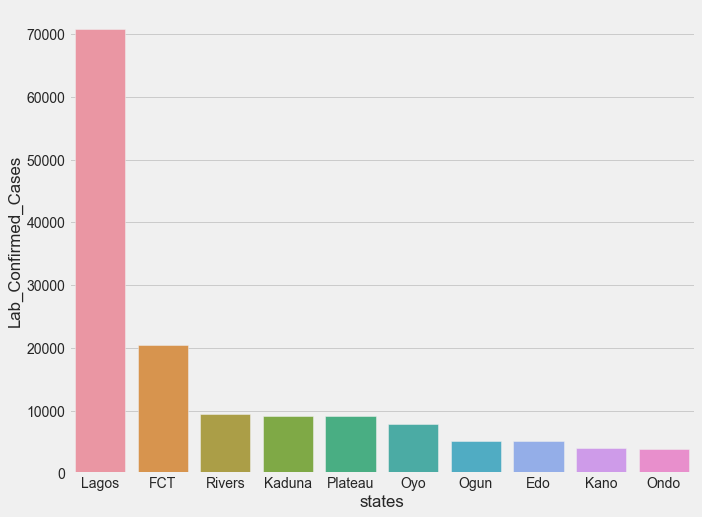

In [66]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Lab_Confirmed_Cases', x='states', data=data1)

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [67]:
data2=data.nlargest(10, 'Discharged')

<AxesSubplot:xlabel='states', ylabel='Discharged'>

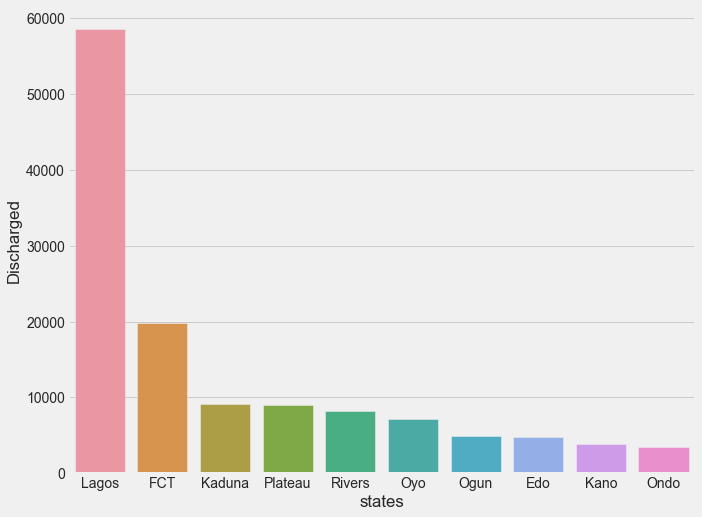

In [68]:
plt.figure(figsize=(10, 8))
sns.barplot(x='states', y='Discharged', data=data2)

TODO D - Plot the top 10 Death cases

In [69]:

data3=data.nlargest(10, 'Deaths')

<AxesSubplot:xlabel='states', ylabel='Deaths'>

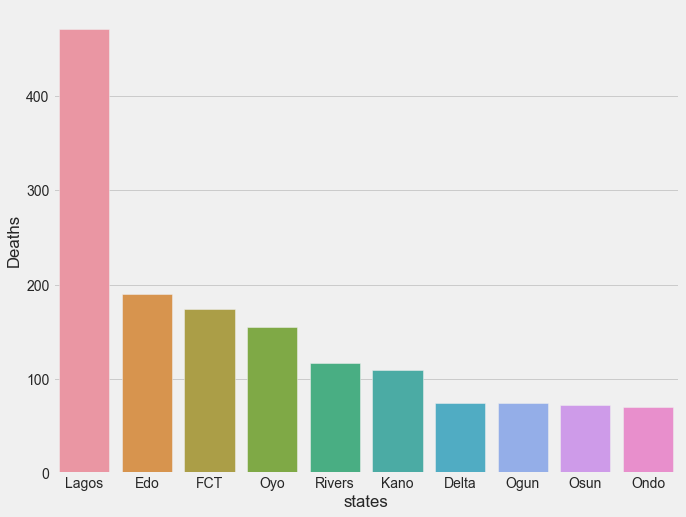

In [70]:
plt.figure(figsize=(10, 8))
sns.barplot(x='states', y='Deaths', data=data3)

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [71]:
nig_timeseries

,Dates,Deaths,Recovered,Confirmed
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
476,5/12/21,2066,156374,165559
477,5/13/21,2066,156387,165612
478,5/14/21,2066,156399,165661
479,5/15/21,2066,156412,165702


In [72]:
nig_timeseries.shape

(481, 4)

In [73]:
list2= ['Deaths','Recovered', 'Confirmed' ]
for i in list2:
    nig_timeseries[i]= nig_timeseries[i].astype('int64')

In [74]:
nig_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 480
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dates      481 non-null    object
 1   Deaths     481 non-null    int64 
 2   Recovered  481 non-null    int64 
 3   Confirmed  481 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 18.8+ KB


<AxesSubplot:>

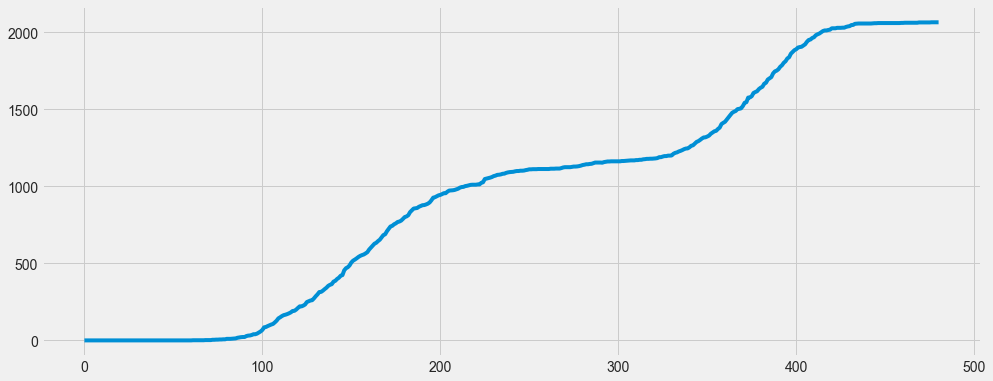

In [75]:
nig_timeseries['Deaths'].plot.line(figsize=(15,6))

<AxesSubplot:>

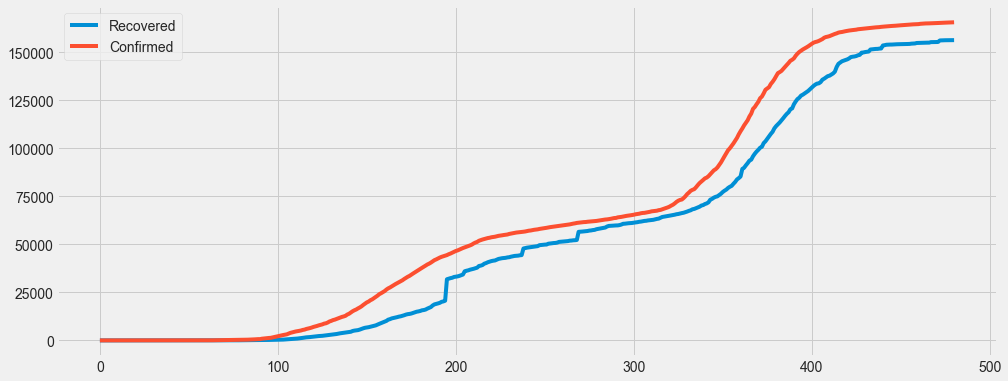

In [76]:
nig_timeseries[['Recovered', 'Confirmed']].plot.line(figsize=(15,6))

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [77]:
nig_timeseries.head()

,Dates,Deaths,Recovered,Confirmed
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0


In [78]:
Daily_inf=nig_timeseries[['Deaths', 'Recovered', 'Confirmed']].diff()
Daily_inf=Daily_inf.replace('NaN', 0, regex=True)

In [79]:
Daily_inf.tail()

,Deaths,Recovered,Confirmed
476,1.0,16.0,44.0
477,0.0,13.0,53.0
478,0.0,12.0,49.0
479,0.0,13.0,41.0
480,0.0,1.0,7.0


<AxesSubplot:>

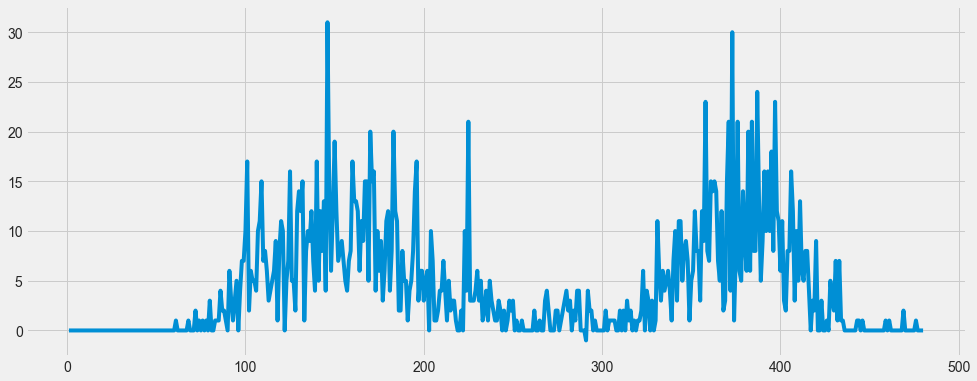

In [80]:
Daily_inf['Deaths'].plot.line(figsize=(15,6))

<AxesSubplot:>

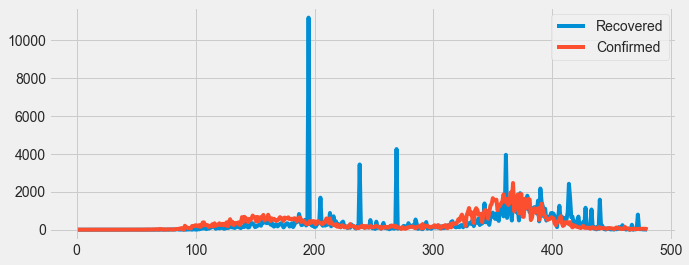

In [81]:
Daily_inf[['Recovered', 'Confirmed']].plot.line(figsize=(10,4))

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [82]:
Daily_inf['Confirmed'].max()

2464.0

In [83]:
Daily_inf[Daily_inf['Confirmed'] == Daily_inf['Confirmed'].max()]

,Deaths,Recovered,Confirmed
367,12.0,1771.0,2464.0


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [84]:
dataset=pd.merge(data, covid_external, on=['states'], how='inner')

In [85]:
 covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   Lab_Confirmed_Cases      37 non-null     int64  
 2   Cases on admission       37 non-null     int64  
 3   Discharged               37 non-null     int64  
 4   Deaths                   37 non-null     int64  
 5   region                   37 non-null     object 
 6   Population               37 non-null     int64  
 7   Overall CCVI Index       37 non-null     float64
 8   Age                      37 non-null     float64
 9   Epidemiological          37 non-null     float64
 10  Fragility                37 non-null     float64
 11  Health System            37 non-null     float64
 12  Population Density       37 non-null     float64
 13  Socio-Economic           37 non-null     float64
 14   Transport Availability  37 

In [87]:
dataset.shape


(37, 16)

In [88]:
dataset.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,70845,11813,58561,471,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,20419,371,19874,174,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,9514,1183,8214,117,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,9205,13,9126,66,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,9135,22,9055,58,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   Lab_Confirmed_Cases      37 non-null     int64  
 2   Cases on admission       37 non-null     int64  
 3   Discharged               37 non-null     int64  
 4   Deaths                   37 non-null     int64  
 5   region                   37 non-null     object 
 6   Population               37 non-null     int64  
 7   Overall CCVI Index       37 non-null     float64
 8   Age                      37 non-null     float64
 9   Epidemiological          37 non-null     float64
 10  Fragility                37 non-null     float64
 11  Health System            37 non-null     float64
 12  Population Density       37 non-null     float64
 13  Socio-Economic           37 non-null     float64
 14   Transport Availability  37 

In [90]:
line=dataset.nlargest(10, 'Lab_Confirmed_Cases')

Text(0.5, 0, 'States')

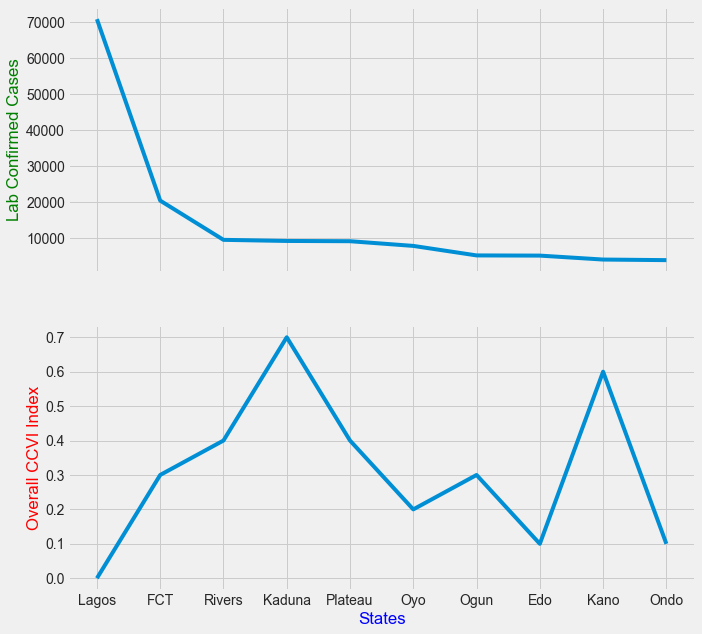

In [91]:

fig, axs = plt.subplots(2,1, sharex=True)
axs[0].plot('states', 'Lab_Confirmed_Cases', data=line)
axs[1].plot('states', 'Overall CCVI Index', data=line)
fig.set_figwidth(10)
fig.set_figheight(10)
axs[0].set_ylabel('Lab Confirmed Cases', color='g')
axs[1].set_ylabel('Overall CCVI Index', color='r')
axs[1].set_xlabel('States', color='b')


TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset.

Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density. Hint: Check out Seaborn Regression Plot.
Provide a summary of your observation

<AxesSubplot:xlabel='Population Density', ylabel='Lab_Confirmed_Cases'>

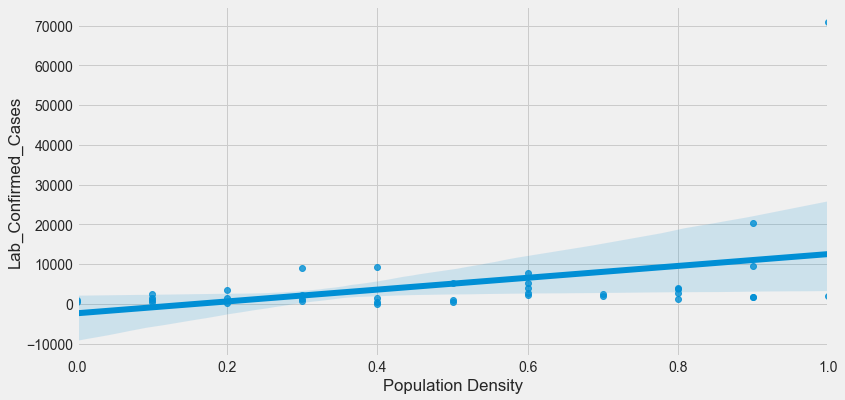

In [92]:
plt.figure(figsize=(12,6))
sns.regplot(y='Lab_Confirmed_Cases', x='Population Density', data=dataset)

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [93]:
dataset.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,70845,11813,58561,471,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,20419,371,19874,174,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,9514,1183,8214,117,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,9205,13,9126,66,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,9135,22,9055,58,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [94]:
dataset.columns

Index(['states', 'Lab_Confirmed_Cases', 'Cases on admission', 'Discharged',
       'Deaths', 'region', 'Population', 'Overall CCVI Index', 'Age',
       'Epidemiological', 'Fragility', 'Health System', 'Population Density',
       'Socio-Economic', ' Transport Availability', 'Acute IHR'],
      dtype='object')

In [95]:
correlation=dataset[['Lab_Confirmed_Cases', 'Cases on admission', 'Discharged',
       'Deaths', 'Population', 'Overall CCVI Index', 'Age',
       'Epidemiological', 'Fragility', 'Health System', 'Population Density',
       'Socio-Economic', ' Transport Availability', 'Acute IHR']].corr()

<AxesSubplot:>

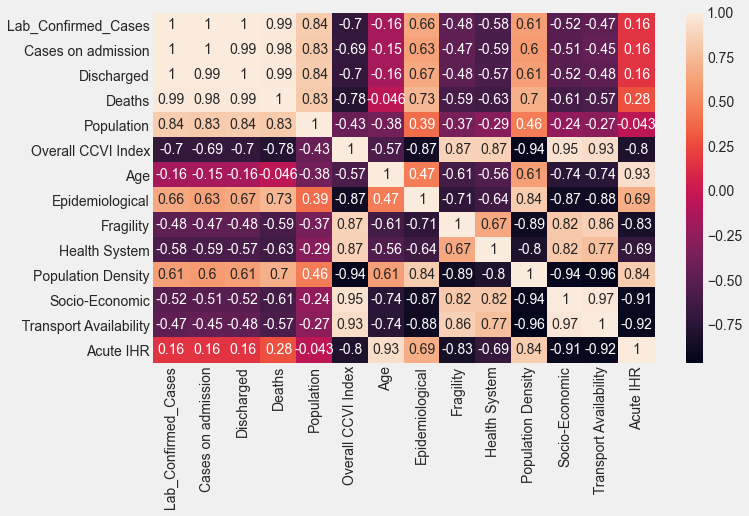

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation.corr(), annot= True)

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [97]:
Gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [98]:
gdp=pd.melt(Gdp, id_vars =['Year'], value_vars =['Q1', 'Q2', 'Q3', 'Q4'])

In [99]:
gdp.head()

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


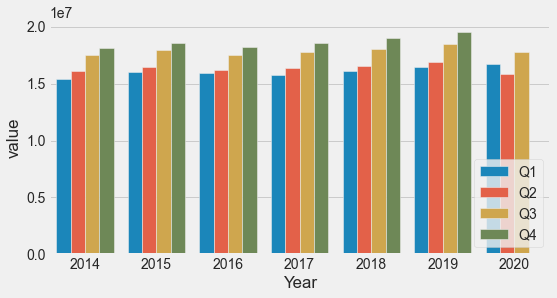

In [100]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x='Year', y='value', hue='variable',  data=gdp)
ax.legend(loc='lower right')

<AxesSubplot:xlabel='Year', ylabel='Q1'>

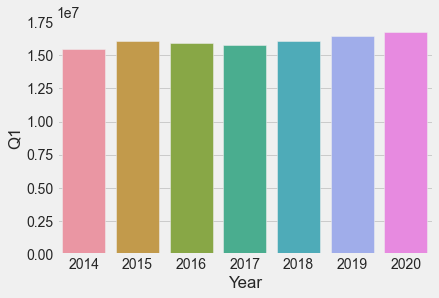

In [101]:
sns.barplot(x='Year', y='Q1',
    data= Gdp)

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [102]:
import geopandas as gpd

In [103]:
url = "https://www.distancelatlong.com/country/nigeria"


In [104]:
#Scraping the Latitude and longitude for each state in nigeria.
headers = {
    "User-Agent":
        "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"
}
page = requests.get(url, headers=headers)
soup1 = BeautifulSoup(page.content, 'html.parser')

In [105]:
#soup1.prettify()

In [106]:
table1= soup1.findAll('table', {"class": "table table-striped setBorder"})

In [107]:
table3=table1[2] #Getting the third table which is the required table.

In [108]:
headers1 = []
for i in table3.find_all('th'):
    #print(i)
    title1 = i.text.strip()
    headers1.append(title1)

In [109]:
headers1


['States', 'Latitude', 'Longitude']

In [110]:
scraped_data=[]
for j in table3.find_all('tr'):
    row_data2 = j.find_all('td')
    row2 = [i.text.strip() for i in row_data2]
    #print(row)
    scraped_data.append(row2)

In [111]:
scraped_data

[[],
 ['Abia (2)', '5.532003041', '7.486002487'],
 ['Adamawa (3)', '10.2703408', '13.2700321'],
 ['Akwa Ibom (2)', '5.007996056', '7.849998524'],
 ['Anambra (2)', '6.210433572', '7.06999711'],
 ['Bauchi (2)', '11.68040977', '10.19001339'],
 ['Benue (2)', '7.190399596', '8.129984089'],
 ['Borno (3)', '10.62042279', '12.18999467'],
 ['Cross River (1)', '4.960406513', '8.330023558'],
 ['Delta (2)', '5.890427265', '5.680004434'],
 ['Edo (1)', '6.340477314', '5.620008096'],
 ['Ekiti (1)', '7.630372741', '5.219980834'],
 ['Enugu (2)', '6.867034321', '7.383362995'],
 ['Federal Capital Territory (1)', '9.083333149', '7.533328002'],
 ['Gombe (2)', '10.29044293', '11.16995357'],
 ['Imo (2)', '5.492997053', '7.026003588'],
 ['Jigawa (1)', '11.7991891', '9.350334607'],
 ['Kaduna (2)', '11.0799813', '7.710009724'],
 ['Kano (1)', '11.99997683', '8.5200378'],
 ['Katsina (2)', '11.5203937', '7.320007689'],
 ['Kebbi (2)', '12.45041445', '4.199939737'],
 ['Kogi (2)', '7.800388203', '6.739939737'],
 ['Kw

In [112]:
scraped_data.remove([])

In [113]:
len(scraped_data)

35

### Two missing Values, Locating the missing states.  

In [114]:
#Creating a DataFrame for Scraped Data
data_content = pd.DataFrame(scraped_data, columns=['States', 'Latitude', 'Longitude'])

In [115]:
data_content.head()

,States,Latitude,Longitude
0,Abia (2),5.532003041,7.486002487
1,Adamawa (3),10.2703408,13.2700321
2,Akwa Ibom (2),5.007996056,7.849998524
3,Anambra (2),6.210433572,7.06999711
4,Bauchi (2),11.68040977,10.19001339


In [116]:
#Clearing Brackets and Whitespace Using Regex.
data_content=data_content.replace(to_replace=r'\s\((.\))', value='', regex=True)

In [117]:
#data_content

In [118]:
data_content= data_content.replace(['Federal Capital Territory'], ['FCT'], regex=True)

In [119]:
data_content.columns=['states', 'Latitude', 'Longitude']

In [120]:
data_content.head()

,states,Latitude,Longitude
0,Abia,5.532003041,7.486002487
1,Adamawa,10.2703408,13.2700321
2,Akwa Ibom,5.007996056,7.849998524
3,Anambra,6.210433572,7.06999711
4,Bauchi,11.68040977,10.19001339


In [121]:
data_content.shape

(35, 3)

In [122]:
data_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   states     35 non-null     object
 1   Latitude   35 non-null     object
 2   Longitude  35 non-null     object
dtypes: object(3)
memory usage: 968.0+ bytes


In [123]:
#Converting the Data types
lis= ['Latitude','Longitude' ]
for i in lis:
    data_content[i]= data_content[i].astype('float')

In [124]:
#finding the missing values

In [125]:
a=set(data['states'])

In [126]:
#a

In [127]:
a1=set(data_content['states'])

In [128]:
#a1

In [129]:
a.difference(a1)

{'Bayelsa', 'Ebonyi'}

In [130]:
#Appending Data For the missing States.

In [131]:
missing_states=pd.DataFrame({'states':['Bayelsa','Ebonyi'], 
                            'Latitude':[4.7719, 6.2649],
                            'Longitude':[6.0699, 8.0137]}, index=['35','36'])

In [132]:
missing_states.head()

,states,Latitude,Longitude
35,Bayelsa,4.7719,6.0699
36,Ebonyi,6.2649,8.0137


In [133]:
missing_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 35 to 36
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   states     2 non-null      object 
 1   Latitude   2 non-null      float64
 2   Longitude  2 non-null      float64
dtypes: float64(2), object(1)
memory usage: 64.0+ bytes


In [134]:
data_content=pd.concat([data_content, missing_states])

In [135]:
data_content.head()

,states,Latitude,Longitude
0,Abia,5.532003,7.486002
1,Adamawa,10.270341,13.270032
2,Akwa Ibom,5.007996,7.849999
3,Anambra,6.210434,7.069997
4,Bauchi,11.680410,10.190013


In [136]:
geo_nig = gpd.read_file('./Nig_geojson.json')

In [137]:
#geo_nig

<AxesSubplot:>

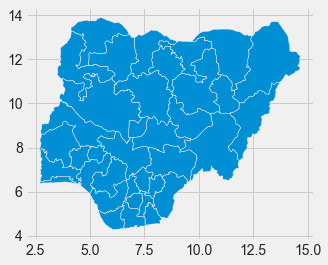

In [138]:
geo_nig.plot()

In [139]:
geo_nig.head()

,admin1Name,admin1Pcod,admin1RefN,admin1AltN,admin1Al_1,admin0Name,admin0Pcod,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036..."
1,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10..."
2,Akwa Ibom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609..."
3,Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,3.595960,0.392661,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698..."
4,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,13.952005,4.011018,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12..."


In [140]:
geo_nig.shape

(37, 13)

In [141]:
Geo_nig=geo_nig[['admin1Name', 'Shape_Leng','Shape_Area', 'geometry']]

In [142]:
Geo_nig.columns=['states', 'Shape_Length', 'Shape_Area', 'geometry']

In [143]:
Geo_nig.head()

,states,Shape_Length,Shape_Area,geometry
0,Abia,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036..."
1,Adamawa,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10..."
2,Akwa Ibom,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609..."
3,Anambra,3.595960,0.392661,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698..."
4,Bauchi,13.952005,4.011018,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12..."


In [144]:
Geo_nig.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   states        37 non-null     object  
 1   Shape_Length  37 non-null     float64 
 2   Shape_Area    37 non-null     float64 
 3   geometry      37 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.3+ KB


<AxesSubplot:>

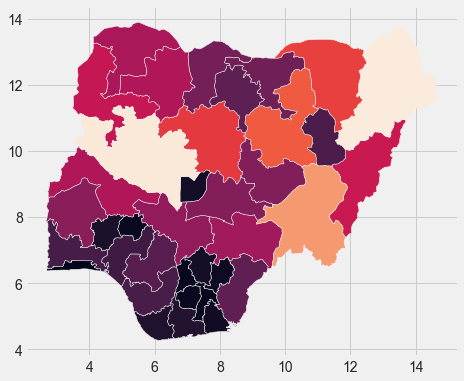

In [145]:
Geo_nig.plot(column='Shape_Area', figsize=(10,6))

In [146]:
Geo_nig= Geo_nig.replace(['Federal Capital Territory', 'Nasarawa'], ['FCT', 'Nassarawa'])

In [147]:
Geo_nig.head()

,states,Shape_Length,Shape_Area,geometry
0,Abia,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036..."
1,Adamawa,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10..."
2,Akwa Ibom,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609..."
3,Anambra,3.595960,0.392661,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698..."
4,Bauchi,13.952005,4.011018,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12..."


In [148]:
data.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,70845,11813,58561,471
1,FCT,20419,371,19874,174
2,Rivers,9514,1183,8214,117
3,Kaduna,9205,13,9126,66
4,Plateau,9135,22,9055,58


In [149]:
Geo_nig=pd.merge(Geo_nig, data, on=['states'], how='inner') #combining the data table and the geo_nig table

In [150]:
data_content.head()

,states,Latitude,Longitude
0,Abia,5.532003,7.486002
1,Adamawa,10.270341,13.270032
2,Akwa Ibom,5.007996,7.849999
3,Anambra,6.210434,7.069997
4,Bauchi,11.680410,10.190013


In [151]:
Geo_nig=pd.merge(Geo_nig, data_content, on=['states'], how='inner') #combining the new dataframe with the data content table

In [152]:
Geo_nig.head()

,states,Shape_Length,Shape_Area,geometry,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,Latitude,Longitude
0,Abia,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036...",1791,8,1760,23,5.532003,7.486002
1,Adamawa,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10...",1136,6,1098,32,10.270341,13.270032
2,Akwa Ibom,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...",3739,764,2943,32,5.007996,7.849999
3,Anambra,3.595960,0.392661,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698...",2043,56,1968,19,6.210434,7.069997
4,Bauchi,13.952005,4.011018,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12...",1553,2,1534,17,11.680410,10.190013


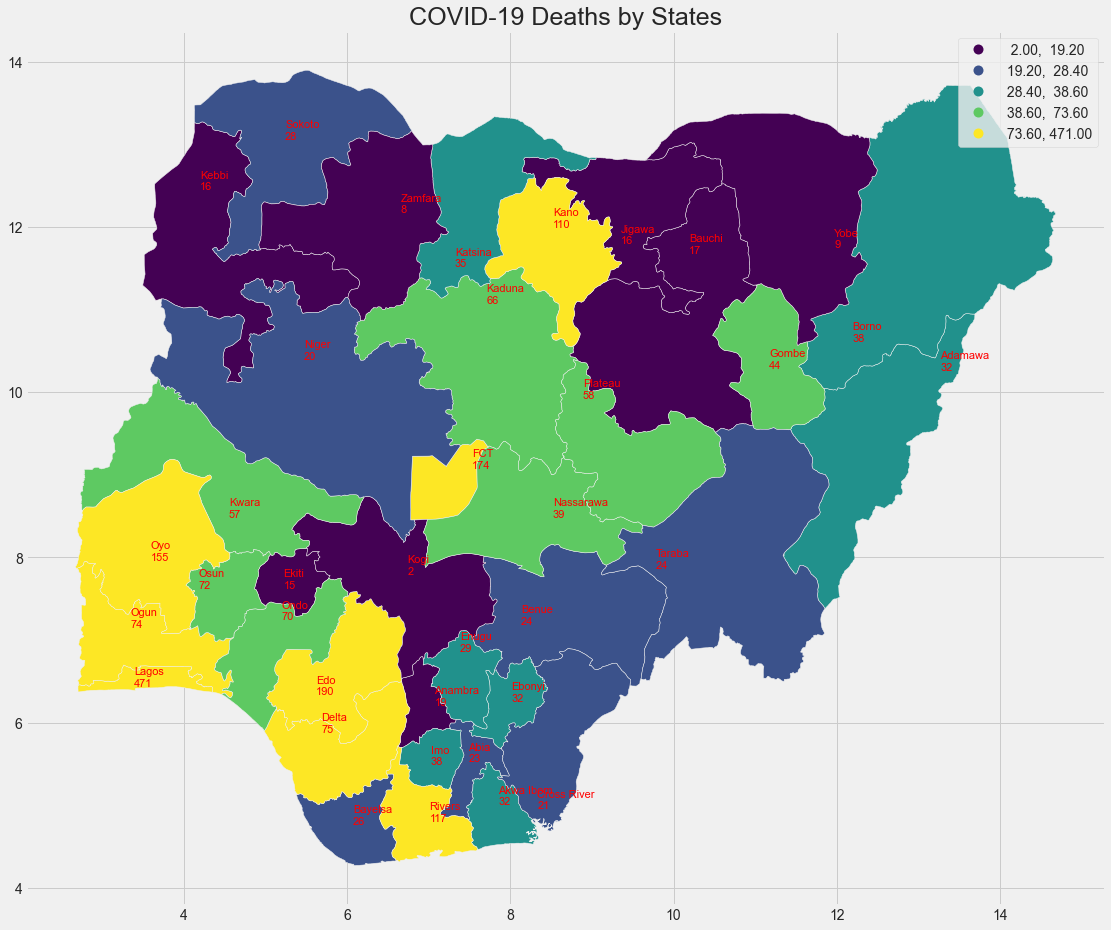

In [153]:
Geo_nig.plot(column='Deaths',figsize=(25,15),cmap='viridis', scheme='quantiles',legend=True) 
for i in range(len(Geo_nig)):
    plt.text(Geo_nig.Longitude[i],Geo_nig.Latitude[i],"{}\n{}".format(Geo_nig.states[i], Geo_nig.Deaths[i]),size=11, color='r')
plt.title('COVID-19 Deaths by States',fontsize=25)
plt.show()

In [154]:
Geo_nig=pd.merge(Geo_nig,covid_external[['states', 'region']] , on=['states'], how='inner')

In [155]:
Geo_nig.head()

,states,Shape_Length,Shape_Area,geometry,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,Latitude,Longitude,region
0,Abia,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036...",1791,8,1760,23,5.532003,7.486002,South East
1,Adamawa,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10...",1136,6,1098,32,10.270341,13.270032,North East
2,Akwa Ibom,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...",3739,764,2943,32,5.007996,7.849999,South East
3,Anambra,3.595960,0.392661,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698...",2043,56,1968,19,6.210434,7.069997,South East
4,Bauchi,13.952005,4.011018,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12...",1553,2,1534,17,11.680410,10.190013,North East


In [156]:
Geo_nig['region'].unique()

array(['South East', 'North East', 'South South', 'North Central',
       'South West', 'North West'], dtype=object)

In [157]:
Geo_nig[Geo_nig['region']=='South South']

,states,Shape_Length,Shape_Area,geometry,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,Latitude,Longitude,region
5,Bayelsa,5.046708,0.776768,"MULTIPOLYGON (((6.55283 5.37988, 6.56198 5.379...",991,45,920,26,4.771900,6.069900,South South
8,Cross River,8.779796,1.711218,"MULTIPOLYGON (((8.56068 4.79847, 8.55944 4.798...",470,15,434,21,4.960407,8.330024,South South
9,Delta,7.372526,1.394082,"MULTIPOLYGON (((6.66892 6.50123, 6.67111 6.484...",2826,195,2556,75,5.890427,5.680004,South South
10,Ebonyi,4.489355,0.518050,"MULTIPOLYGON (((8.24431 6.78560, 8.24976 6.775...",2047,12,2003,32,6.264900,8.013700,South South
11,Edo,7.889425,1.595809,"MULTIPOLYGON (((6.13357 7.55208, 6.13835 7.550...",5133,127,4816,190,6.340477,5.620008,South South
32,Rivers,5.814545,0.830196,"MULTIPOLYGON (((6.64358 5.70171, 6.64836 5.699...",9514,1183,8214,117,4.810002,7.010001,South South


In [158]:
Geo_nig.at[10, 'region']='South East' #Setting the correct region 

In [159]:
Geo_nig.at[2, 'region']='South South' #Setting the correct region

In [160]:
Geo_nig[Geo_nig['states']=='Ebonyi']['region'] #Checking if the changes has been effected.

10    South East
Name: region, dtype: object

In [161]:
south_south=(Geo_nig[Geo_nig['region']=='South South']).reset_index()

In [162]:
south_south.head()

,index,states,Shape_Length,Shape_Area,geometry,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,Latitude,Longitude,region
0,2,Akwa Ibom,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...",3739,764,2943,32,5.007996,7.849999,South South
1,5,Bayelsa,5.046708,0.776768,"MULTIPOLYGON (((6.55283 5.37988, 6.56198 5.379...",991,45,920,26,4.771900,6.069900,South South
2,8,Cross River,8.779796,1.711218,"MULTIPOLYGON (((8.56068 4.79847, 8.55944 4.798...",470,15,434,21,4.960407,8.330024,South South
3,9,Delta,7.372526,1.394082,"MULTIPOLYGON (((6.66892 6.50123, 6.67111 6.484...",2826,195,2556,75,5.890427,5.680004,South South
4,11,Edo,7.889425,1.595809,"MULTIPOLYGON (((6.13357 7.55208, 6.13835 7.550...",5133,127,4816,190,6.340477,5.620008,South South


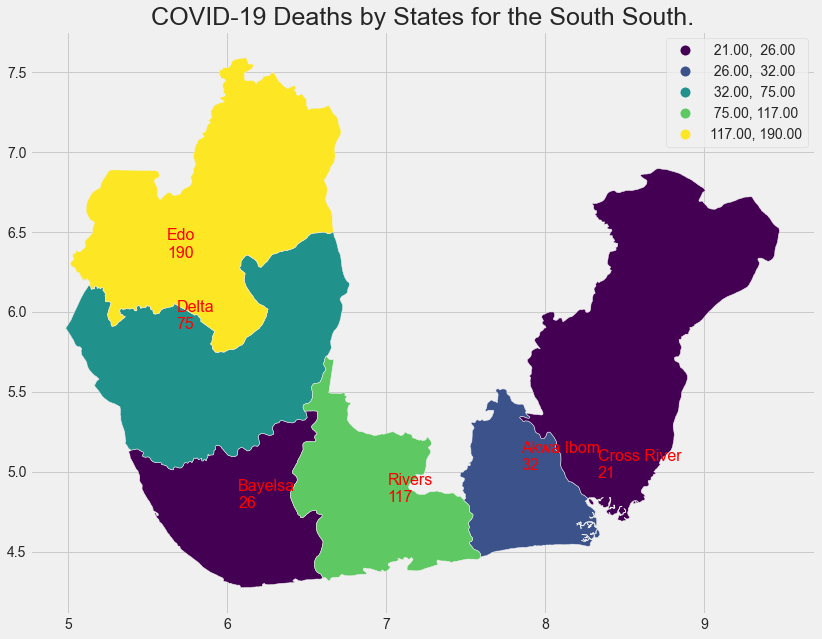

In [163]:
south_south.plot(column='Deaths',figsize=(20,10),cmap='viridis', scheme='quantiles',legend=True)
for i in range(len(south_south)):
    plt.text(south_south.Longitude[i],south_south.Latitude[i],"{}\n{}".format(south_south.states[i], south_south.Deaths[i]),size=16, color='r')
plt.title('COVID-19 Deaths by States for the South South.',fontsize=25)
plt.show()

In [164]:
south_east=(Geo_nig[Geo_nig['region']=='South East']).reset_index()

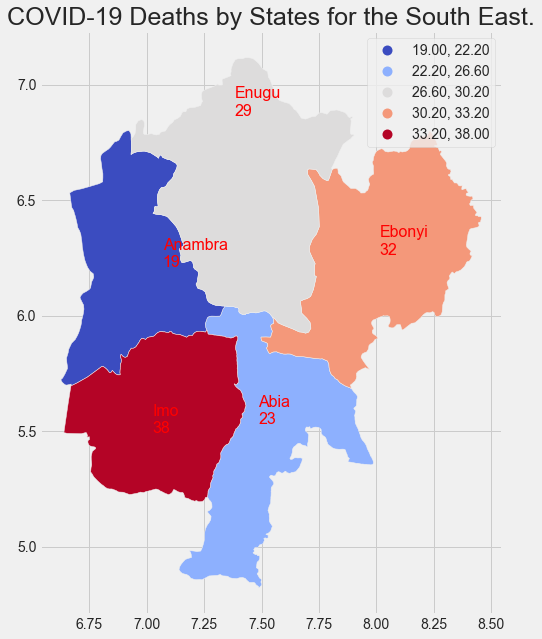

In [165]:
south_east.plot(column='Deaths',figsize=(20,10),cmap='coolwarm', scheme='quantiles',legend=True)
for i in range(len(south_east)):
    plt.text(south_east.Longitude[i],south_east.Latitude[i],"{}\n{}".format(south_east.states[i], south_east.Deaths[i]),size=16, color='r')
plt.title('COVID-19 Deaths by States for the South East.',fontsize=25)
plt.show()

In [166]:
south_west=(Geo_nig[Geo_nig['region']=='South West']).reset_index()

In [167]:
south_west

,index,states,Shape_Length,Shape_Area,geometry,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,Latitude,Longitude,region
0,12,Ekiti,3.395633,0.471634,"MULTIPOLYGON (((5.50593 8.01869, 5.50872 8.017...",1317,229,1073,15,7.630373,5.219981,South West
1,24,Lagos,4.287770,0.300166,"MULTIPOLYGON (((3.32387 6.67388, 3.32879 6.673...",70845,11813,58561,471,6.443262,3.391531,South West
2,27,Ogun,9.649774,1.364021,"MULTIPOLYGON (((2.84613 7.92988, 2.85077 7.929...",5186,221,4891,74,7.160427,3.350017,South West
3,28,Ondo,7.751109,1.233546,"MULTIPOLYGON (((5.92604 7.73182, 5.92513 7.728...",3873,280,3523,70,7.250396,5.199982,South West
4,29,Osun,4.660140,0.704549,"MULTIPOLYGON (((4.94975 8.05548, 4.95674 8.053...",2673,28,2573,72,7.629959,4.179993,South West
5,30,Oyo,8.624586,2.264918,"MULTIPOLYGON (((4.21046 8.97003, 4.25339 8.966...",7829,511,7163,155,7.970016,3.590003,South West


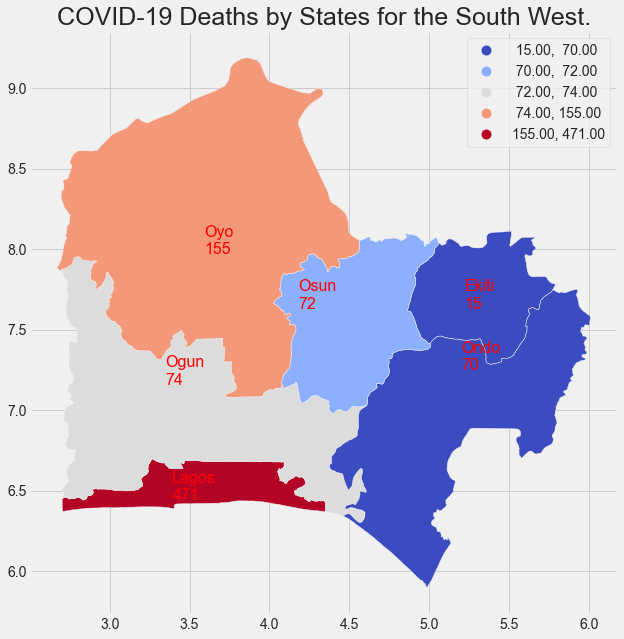

In [168]:
south_west.plot(column='Deaths',figsize=(20,10),cmap='coolwarm', scheme='quantiles',legend=True)
for i in range(len(south_west)):
    plt.text(south_west.Longitude[i],south_west.Latitude[i],"{}\n{}".format(south_west.states[i], south_west.Deaths[i]),size=16, color='r')
plt.title('COVID-19 Deaths by States for the South West.',fontsize=25)
plt.show()

In [169]:
north_east=(Geo_nig[Geo_nig['region']=='North East']).reset_index()

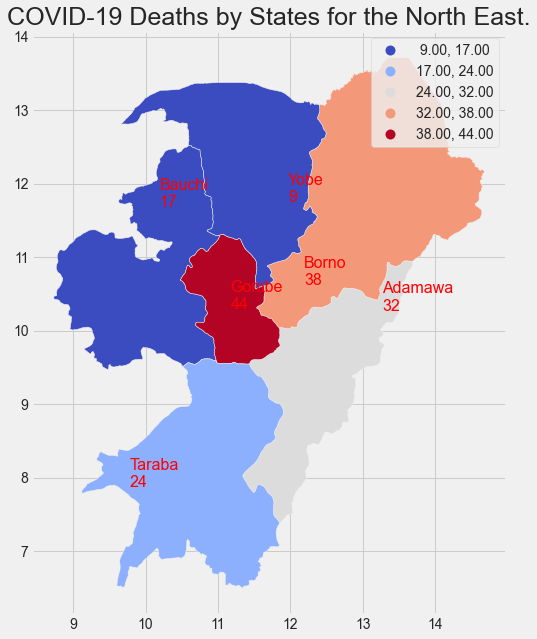

In [170]:
north_east.plot(column='Deaths',figsize=(20,10),cmap='coolwarm', scheme='quantiles',legend=True)
for i in range(len(north_east)):
    plt.text(north_east.Longitude[i],north_east.Latitude[i],"{}\n{}".format(north_east.states[i], north_east.Deaths[i]),size=16, color='r')
plt.title('COVID-19 Deaths by States for the North East.',fontsize=25)
plt.show()

In [171]:
north_west=(Geo_nig[Geo_nig['region']=='North West']).reset_index()

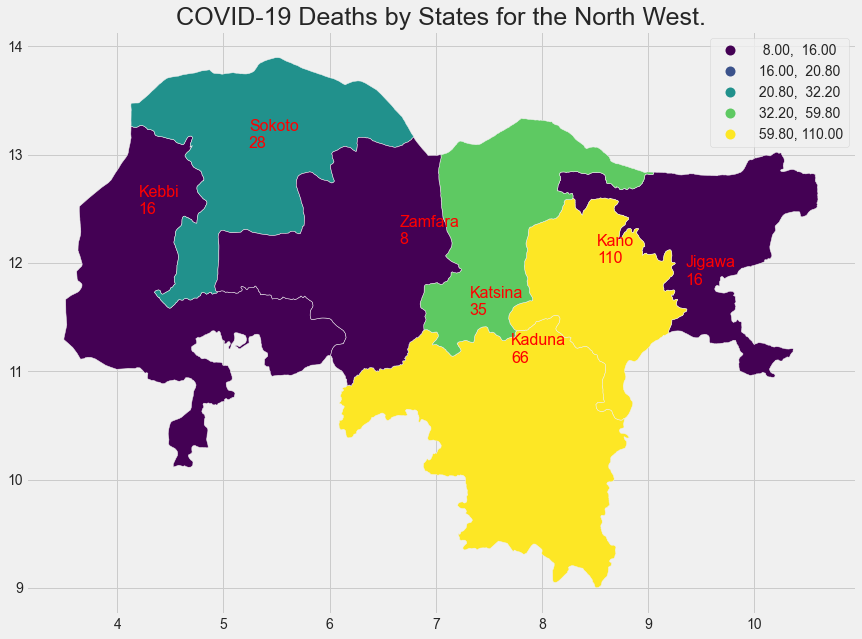

In [175]:
north_west.plot(column='Deaths',figsize=(20,10),cmap='viridis', scheme='quantiles',legend=True)
for i in range(len(north_west)):
    plt.text(north_west.Longitude[i],north_west.Latitude[i],"{}\n{}".format(north_west.states[i], north_west.Deaths[i]),size=16, color='r')
plt.title('COVID-19 Deaths by States for the North West.',fontsize=25)
plt.show()

In [173]:
north_central=(Geo_nig[Geo_nig['region']=='North Central']).reset_index()

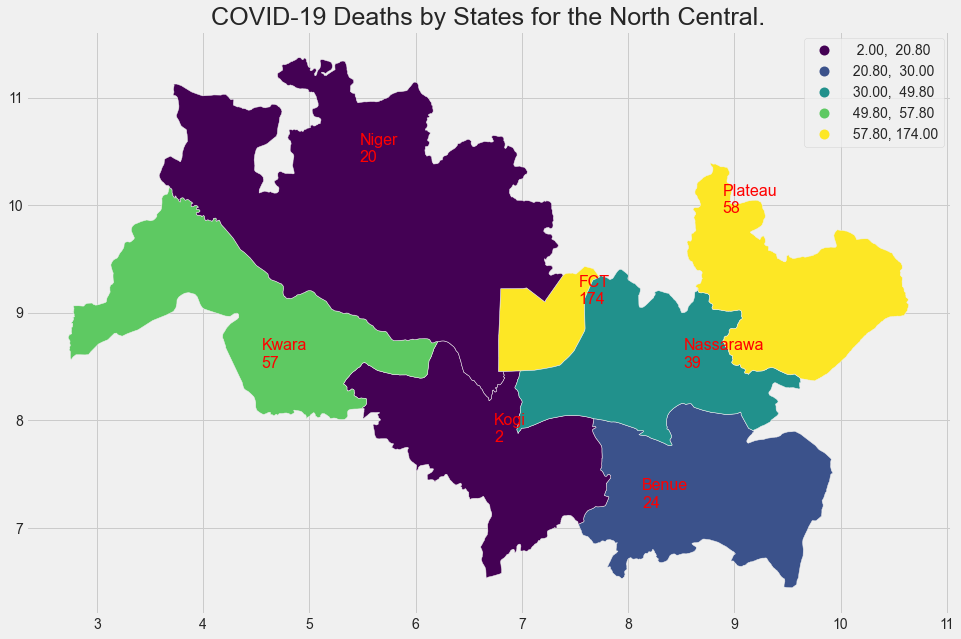

In [174]:
north_central.plot(column='Deaths',figsize=(20,10),cmap='viridis', scheme='quantiles',legend=True)
for i in range(len(north_central)):
    plt.text(north_central.Longitude[i],north_central.Latitude[i],"{}\n{}".format(north_central.states[i], north_central.Deaths[i]),size=16, color='r')
plt.title('COVID-19 Deaths by States for the North Central.',fontsize=25)
plt.show()